In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup
import urllib.request
import re
import time

excutable_path = 'chromedriver.exe'

source_url = "https://namu.wiki/RecentChanges"

driver = webdriver.Chrome(executable_path = excutable_path)
driver.get(source_url)
time.sleep(5)
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
contents_table = soup.find("table")
table_body = contents_table.find('tbody')
table_rows = table_body.find_all('tr')

In [5]:
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get("href")
        if "png" not in page_url:
            page_urls.append(page_url)
            
page_urls = list(set(page_urls))
for page in page_urls[:5] :
    print(page)
    
driver.close()

https://namu.wiki/w/%EA%B3%B5%EB%A6%AC
https://namu.wiki/w/%EC%9B%90%EC%8B%A0/%EB%93%B1%EC%9E%A5%EC%9D%B8%EB%AC%BC/%EB%A6%AC%EC%9B%94
https://namu.wiki/w/%ED%8B%80:%EC%96%B4%EC%84%A4%ED%8A%B8%20%EB%A6%B4%EB%A6%AC%20Last%20Bullet%20%EC%BD%9C%EB%9D%BC%EB%B3%B4%20%EC%BA%90%EB%A6%AD%ED%84%B0
https://namu.wiki/w/%EA%B8%B0%ED%94%84(%EA%B0%80%EB%A9%B4%EB%9D%BC%EC%9D%B4%EB%8D%94%20%EB%A6%AC%EB%B0%94%EC%9D%B4%EC%8A%A4)
https://namu.wiki/w/%EB%8B%A4%ED%81%AC%20%EC%82%AC%EC%9D%B4%EB%93%9C%EC%9D%98%20%EC%98%88%EC%96%B8%EC%9E%90


In [6]:
driver = webdriver.Chrome(executable_path=excutable_path)
driver.get(page_urls[0])
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
contents_table = soup.find(name='article')
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_pargraphs = contents_table.find_all(name="div", attrs={"class" : "wiki-paragraph"})
content_courpus_list = []

for paragraphs in content_pargraphs :
    content_courpus_list.append(paragraphs.text)
content_courpus = "".join(content_courpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_courpus)

driver.close()

공리 


동음이의어수리논리학


1. 사회, 행정, 법학 용어2. 윤리학 용어3. 수학, 철학 용어4. 중화권의 배우 공리(배우)5. 지명6. 공항리무진의 줄임말7. 공동리더의 줄임말公利공공 이익의 줄임말이다. 비슷한 말로 공익이 있다.功利 / utility결과를 위한 효용을 의미한다. 공리주의 문서로.일부 학자•번역가는 공리주의를 번역할 때 1번 문단의 공리로 왜곡하는 경우가 있다.수학기초론Foundations of Mathematics [ 펼치기 · 접기 ]다루는 대상과 주요 토픽수리논리학논리 · 논증{귀납논증 · 연역논증} · 공리 및 공준 · 증명{자동정리증명 · 귀류법 · 수학적 귀납법 · 반증 · PWW} · 논리함수 · 논리 연산 · 잘 정의됨 · 조건문(조각적 정의) · 명제 논리(명제, 아이버슨 괄호 · 역 · 이 · 대우) · 양상논리 · 술어 논리(존재성과 유일성) · 형식문법 · 유형 이론범주론함자 · 수반 · 자연 변환 · 모나드 · 쌍대성집합론집합(원소 · 공집합 · 집합족 · 곱집합 · 멱집합) · 관계(동치관계 · 순서 관계) · 서수(하세 다이어그램 · 큰 가산서수) · 수 체계 · ZFC(선택공리) · 기수(초한기수) · 절대적 무한계산가능성 이론 튜링 기계 · 바쁜 비버 · 정지 문제 · 재귀함수 · 계산정리드모르간 법칙 · 대각선 논법 · 러셀의 역설 · 거짓말쟁이의 역설 · 뢰벤하임-스콜렘 정리 · 슈뢰더-베른슈타인 정리 · 퍼스의 항진명제 · 굿스타인 정리 · 불완전성 정리 · 힐베르트의 호텔 · 연속체 가설기타 예비사항(약어 및 기호) · 벤 다이어그램 · 수학철학다루는 대상과 주요 토픽수리논리학논리 · 논증{귀납논증 · 연역논증} · 공리 및 공준 · 증명{자동정리증명 · 귀류법 · 수학적 귀납법 · 반증 · PWW} · 논리함수 · 논리 연산 · 잘 정의됨 · 조건문(조각적 정의) · 명제 논리(명제, 아이버슨 괄호 · 역 · 이 · 대우) · 양상논리 · 술어 논리(존재성과 유일성) · 형식문법 · 유형 이론범주

In [7]:
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

for page_url in page_urls:

    driver = webdriver.Chrome(executable_path=excutable_path)
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    contents_table = soup.find(name="article")
    title = contents_table.find_all("h1")[0]
    
    if len(contents_table.find_all("ul")) > 0:
        category = contents_table.find_all("ul")[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
    driver.close()

In [8]:
df.head(5)

,title,category,content_text
0,공리,동음이의어수리논리학,"1. 사회, 행정, 법학 용어2. 윤리학 용어3. 수학, 철학 용어4. 중화권의 배..."
1,원신/등장인물/리월,원신/등장인물,상위 문서: 원신/등장인물 [ 펼치기 · 접기 ]스토리스토리 · 등장인물 (몬...
2,틀:어설트 릴리 Last Bullet 콜라보 캐릭터,어설트 릴리,역대 어설트 릴리 Last Bullet 콜라보 캐릭터마법소녀 리리컬 나노하 Deto...
3,기프(가면라이더 리바이스),가면라이더 시리즈 등장인물/리바이스데드맨즈악마(가면라이더 리바이스)가면라이더 시리즈...,미라 상태로 잠들어 있는 기프.1. 개요2. 작중 행적2.1. 과거2.2. 1부 -...
4,다크 사이드의 예언자,스타워즈 레전드스타워즈 세력 및 단체,Prophets of the Dark Side1. 개요스타워즈에 등장하는 포스 센시...


In [9]:
def text_cleaning(text):
    hangul = re.compile('[^ㄱ-ㅣ 가-힣]+')
    result = hangul.sub('',text)
    return result

In [10]:
print(text_cleaning(df['content_text'][0]))

 사회 행정 법학 용어 윤리학 용어 수학 철학 용어 중화권의 배우 공리배우 지명 공항리무진의 줄임말 공동리더의 줄임말공공 이익의 줄임말이다 비슷한 말로 공익이 있다  결과를 위한 효용을 의미한다 공리주의 문서로일부 학자번역가는 공리주의를 번역할 때 번 문단의 공리로 왜곡하는 경우가 있다수학기초론    펼치기  접기 다루는 대상과 주요 토픽수리논리학논리  논증귀납논증  연역논증  공리 및 공준  증명자동정리증명  귀류법  수학적 귀납법  반증    논리함수  논리 연산  잘 정의됨  조건문조각적 정의  명제 논리명제 아이버슨 괄호  역  이  대우  양상논리  술어 논리존재성과 유일성  형식문법  유형 이론범주론함자  수반  자연 변환  모나드  쌍대성집합론집합원소  공집합  집합족  곱집합  멱집합  관계동치관계  순서 관계  서수하세 다이어그램  큰 가산서수  수 체계  선택공리  기수초한기수  절대적 무한계산가능성 이론 튜링 기계  바쁜 비버  정지 문제  재귀함수  계산정리드모르간 법칙  대각선 논법  러셀의 역설  거짓말쟁이의 역설  뢰벤하임스콜렘 정리  슈뢰더베른슈타인 정리  퍼스의 항진명제  굿스타인 정리  불완전성 정리  힐베르트의 호텔  연속체 가설기타 예비사항약어 및 기호  벤 다이어그램  수학철학다루는 대상과 주요 토픽수리논리학논리  논증귀납논증  연역논증  공리 및 공준  증명자동정리증명  귀류법  수학적 귀납법  반증    논리함수  논리 연산  잘 정의됨  조건문조각적 정의  명제 논리명제 아이버슨 괄호  역  이  대우  양상논리  술어 논리존재성과 유일성  형식문법  유형 이론범주론함자  수반  자연 변환  모나드  쌍대성집합론집합원소  공집합  집합족  곱집합  멱집합  관계동치관계  순서 관계  서수하세 다이어그램  큰 가산서수  수 체계  선택공리  기수초한기수  절대적 무한계산가능성 이론 튜링 기계  바쁜 비버  정지 문제  재귀함수  계산정리드모르간 법칙  대각선 논법  러셀의 역설  거짓말쟁이의 역설  뢰벤하임스콜렘 정리 

In [11]:
df['title'] = df['title'].apply(lambda x:text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,공리,동음이의어수리논리학,사회 행정 법학 용어 윤리학 용어 수학 철학 용어 중화권의 배우 공리배우 지명 공...
1,원신등장인물리월,원신등장인물,상위 문서 원신등장인물 펼치기 접기 스토리스토리 등장인물 몬드 리월 이...
2,틀어설트 릴리 콜라보 캐릭터,어설트 릴리,역대 어설트 릴리 콜라보 캐릭터마법소녀 리리컬 나노하 타카마치 나노하페이트 테스...
3,기프가면라이더 리바이스,가면라이더 시리즈 등장인물리바이스데드맨즈악마가면라이더 리바이스가면라이더 시리즈의 악...,미라 상태로 잠들어 있는 기프 개요 작중 행적 과거 부 악마와 계약 편 부 계약...
4,다크 사이드의 예언자,스타워즈 레전드스타워즈 세력 및 단체,개요스타워즈에 등장하는 포스 센시티브 조직 집단시스의 이단자인 다스 밀레니...


In [12]:
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

공리 원신등장인물리월 틀어설트 릴리   콜라보 캐릭터 기프가면라이더 리바이스 다크 사이드의 예언자 코쿤유희왕 질주하는 밀실의 모험 타나카 아츠코 자일대우버스  경북대학교사범대학부설고등학교 매스 이펙트  처녀비치 남작 게돈용병단 인천 흥국생명 핑크스파이더스 틀대광위 준공영제 버스 노선  진주시 와일드카드 시리즈 이용익드라마 트레버 로렌스 네오 스페이시언 제대 대통령 선거개표 결과세대별 강남파이낸스센터 야마시타 히로유키 일라이다 일마즈 날개 크리보 네오스 간드라   그레모리클로저스 패스파인더소설 엘리멘틀 히어로  사태 정치극단주의 년 러시아의 우크라이나 침공경과월 프린세스 커넥트 등장인물 마스터 우 김정숙 외유성 해외 순방 및 관광 논란  오렌지 주스등장인물큐피슈팅 손톱모브사이코  융합유희왕 쌍방울그룹년 조성원 오클라호마 대학교 에이블 코퍼레이션 임금 체불 논란 궁극보옥신 레인보우 드래곤 오버드라이브 미야나기 가제트유희왕 케익오뜨 나의 해방일지등장인물 사일런트 스워드맨  와일드카드 결정전 계 애니메이터 김해국제공항 매지션 걸 알레이나 일마즈 데니 안 대한민국 국군장성급 장교 왜사니 현역 해병대원 우크라이나 의용군 참전 미수 사건 팬덤목록 보옥 브루노 부차라티 통일 타카 라지만 김은수프로게이머 년 미얀마 민주화 운동 


In [13]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [14]:
count

Counter({'사회': 62,
         '행정': 17,
         '법학': 2,
         '용어': 17,
         '윤리학': 1,
         '수학': 15,
         '철학': 6,
         '중화권': 5,
         '배우': 20,
         '공리': 34,
         '지명': 22,
         '공항리무진': 10,
         '리더': 21,
         '공공': 3,
         '이익': 13,
         '말로': 10,
         '공익': 1,
         '결과': 91,
         '위': 718,
         '효용': 2,
         '의미': 77,
         '공리주의': 2,
         '문서': 2434,
         '일부': 187,
         '학자': 6,
         '번역가': 1,
         '번': 2558,
         '역할': 73,
         '때': 563,
         '문단': 2373,
         '왜곡': 18,
         '경우': 438,
         '수학기초론': 1,
         '접기': 432,
         '대상': 101,
         '주요': 38,
         '토픽': 2,
         '수리논리학': 2,
         '논리': 34,
         '논증': 4,
         '귀납논증': 2,
         '연역': 2,
         '및': 233,
         '공준': 4,
         '증명': 18,
         '자동': 12,
         '정리': 42,
         '귀류법': 2,
         '귀납법': 2,
         '반증': 2,
         '함수': 4,
         '연산': 6,
       

In [15]:
remove_char_counter = Counter({x : count[x] for x in count if len(x) >1})
print(remove_char_counter)

Counter({'문서': 2434, '문단': 2373, '이전': 2229, '역사': 2229, '카드': 1230, '드래곤': 1082, '공식': 1050, '시즌': 739, '자신': 619, '때문': 572, '대학교': 502, '공격': 457, '몬스터': 455, '테마': 451, '경우': 438, '접기': 432, '효과': 421, '히어로': 414, '이후': 408, '사용': 405, '사건': 400, '다른': 395, '융합': 392, '소환': 377, '블랙': 375, '육군': 371, '에이스': 360, '토론': 343, '스타': 337, '사항': 336, '사람': 328, '사이버': 327, '합의': 327, '이름': 317, '대한': 314, '부분': 313, '아이즈': 311, '내용': 309, '명칭': 301, '위해': 287, '유우': 279, '사실': 276, '정도': 274, '오스': 267, '다크': 264, '모습': 262, '엘리': 260, '유희왕': 258, '진주': 258, '감독': 255, '로드': 239, '준장': 236, '하나': 230, '등장': 225, '퓨전': 225, '페이': 221, '부차': 221, '문제': 219, '마법': 219, '시리즈': 216, '라티': 216, '궁극': 214, '캐릭터': 211, '세븐': 211, '대한민국': 210, '지역': 208, '관련': 207, '가드': 207, '한국': 205, '전투': 204, '상황': 204, '또한': 204, '전체': 198, '존재': 194, '상대': 193, '특수': 193, '당시': 191, '대해': 188, '능력': 188, '공항': 188, '일부': 187, '사일런트': 187, '학교': 187, '네오': 185, '부산': 185, '버스': 184, '게임': 184, '발동': 184, '인

In [16]:
korean_stopwords_path = 'C:\\Users\\YONSAI\\Documents\\GitHub\\Yonsai_IT_Academy\\vscode\\python\\dataMining\\data\\korean_stopwords.txt'

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
    
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [17]:
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장', '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', '이름', '년월']
 
for stopword in namu_wiki_stopwords :
    stopwords.append(stopword)    

In [18]:
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'문단': 2373, '이전': 2229, '역사': 2229, '카드': 1230, '드래곤': 1082, '공식': 1050, '시즌': 739, '대학교': 502, '공격': 457, '몬스터': 455, '테마': 451, '접기': 432, '효과': 421, '히어로': 414, '사건': 400, '융합': 392, '소환': 377, '블랙': 375, '육군': 371, '에이스': 360, '토론': 343, '스타': 337, '사항': 336, '사람': 328, '사이버': 327, '합의': 327, '대한': 314, '부분': 313, '아이즈': 311, '명칭': 301, '위해': 287, '유우': 279, '오스': 267, '다크': 264, '엘리': 260, '유희왕': 258, '진주': 258, '감독': 255, '로드': 239, '준장': 236, '등장': 225, '퓨전': 225, '페이': 221, '부차': 221, '문제': 219, '마법': 219, '시리즈': 216, '라티': 216, '궁극': 214, '캐릭터': 211, '세븐': 211, '대한민국': 210, '지역': 208, '관련': 207, '가드': 207, '한국': 205, '전투': 204, '전체': 198, '존재': 194, '상대': 193, '특수': 193, '당시': 191, '대해': 188, '능력': 188, '공항': 188, '일부': 187, '사일런트': 187, '학교': 187, '네오': 185, '부산': 185, '버스': 184, '게임': 184, '발동': 184, '인간': 182, '팬덤': 177, '그레모리': 177, '다시': 174, '필드': 170, '육사': 169, '김해': 168, '옥수': 165, '오브': 162, '선수': 158, '레벨': 157, '미얀마': 157, '하이퍼': 157, '파괴': 156, '플레이어': 15

In [21]:
import random
import pytagcloud
import webbrowser

ranked_tags = remove_char_counter.most_common(40)

taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname = 'NanumGothic', rectangular=False)

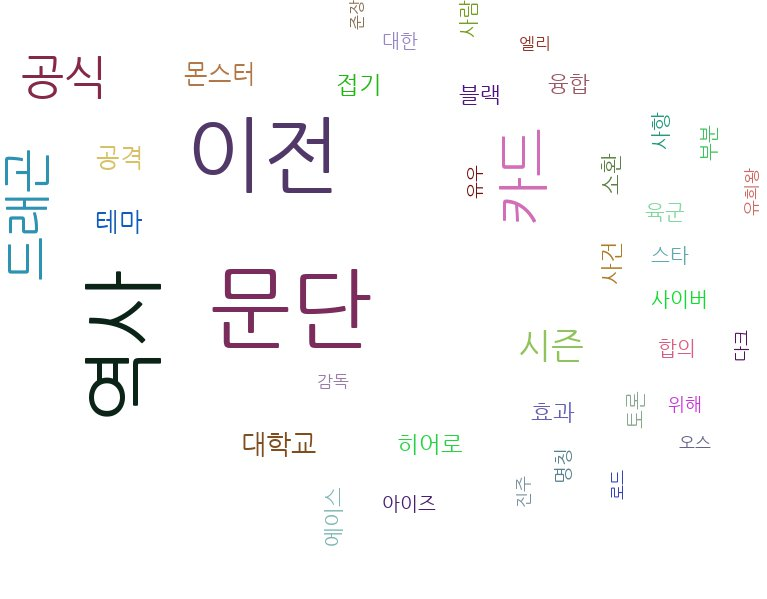

In [22]:
from IPython.display import Image
Image(filename='wordcloud.jpg')

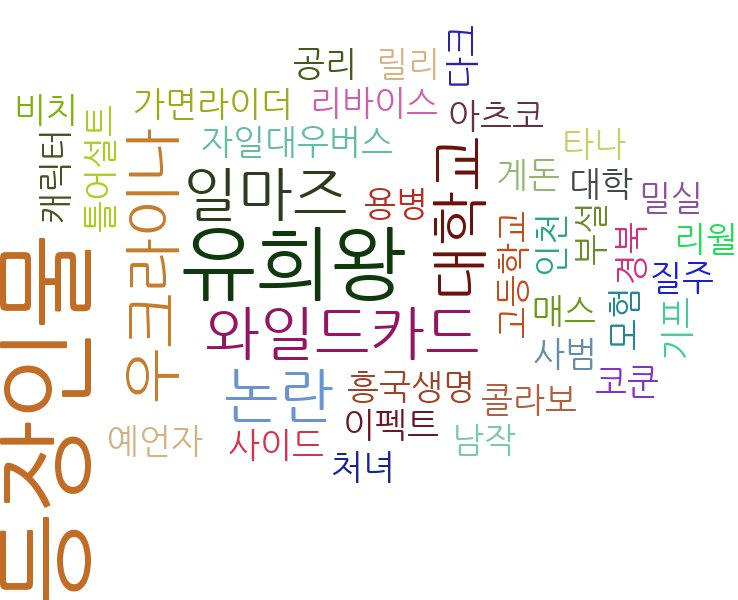

In [23]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

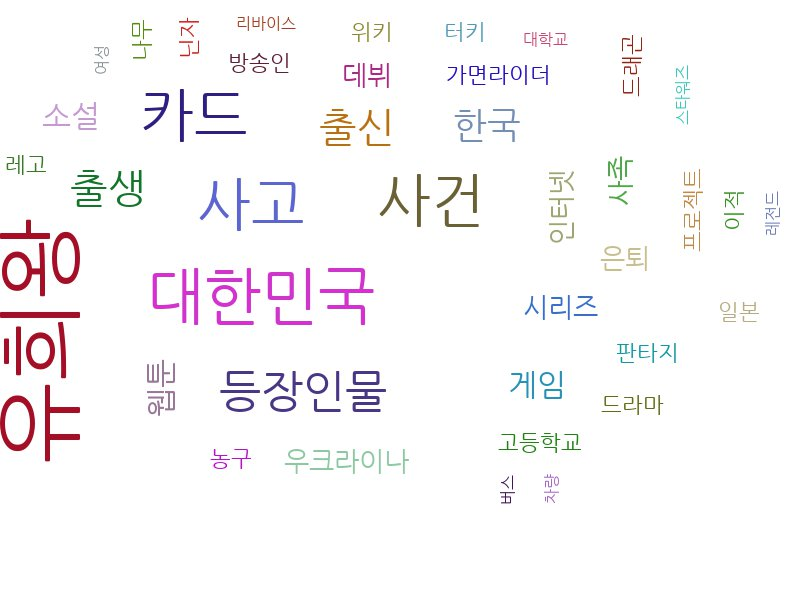

In [27]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900,600), fontname = 'NanumGothic', rectangular=False)

Image(filename='category_wordcloud.jpg')